# IEEE Competition Let's Begin
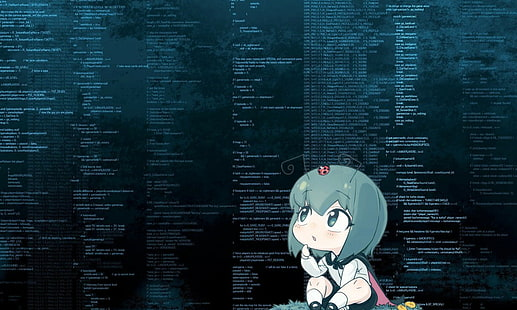

# Sequence Alignment
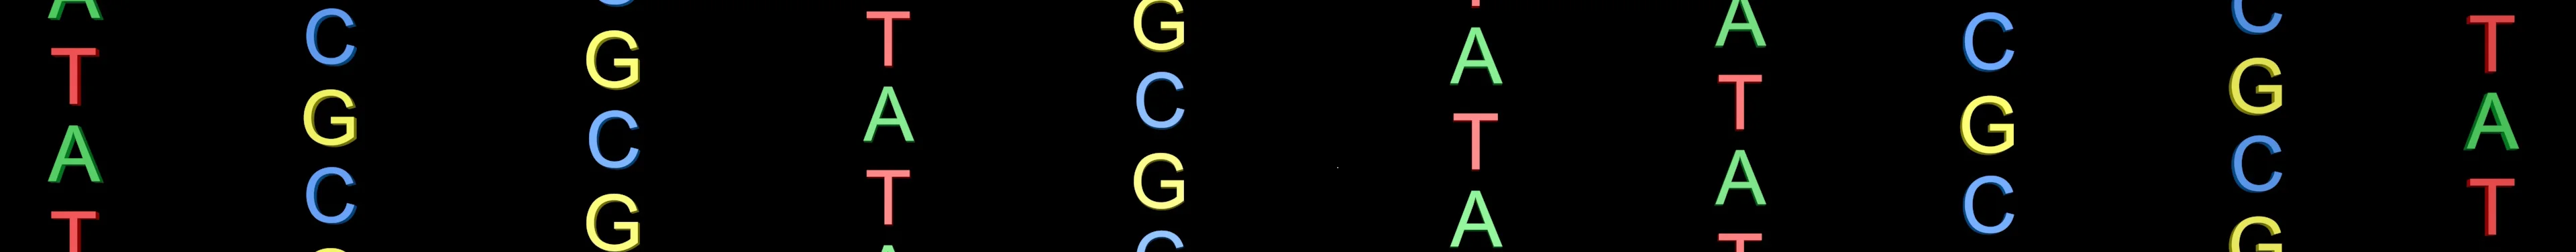

- Sequence alignment is the process of comparing two or more
sequences of nucleotides or amino acids to identify regions of
similarity and difference. It is an important tool in bioinformatics and
is used to compare DNA or protein sequences to identify evolutionary
relationships, functional domains, mutations, and other features.
There are two main types of sequence alignment:
- global alignment
- local alignment.
In global alignment, the entire length of both
sequences is aligned from the beginning to the end, whereas in local
alignment, only the most similar regions of the sequences are aligned.

_______________________________________________________________________________
- Write a code that takes 2 sequences as an input and performs sequence
alignment
- Global alignment: 5 points
- Local Alignment: 10 points
- Bonus: 5 points
( Use the same 2 sequences and compare your code output
with sequence alignment available tools as BLAST )
- N.B. Using more tools, you can earn more points



In [ ]:
!pip install Biopython
!pwd

/content


In [ ]:
from Bio import SeqIO
from Bio.Align import PairwiseAligner
from Bio.pairwise2 import align

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load sequences from the FASTA files
seq1 = next(SeqIO.parse('/content/gene.fna', 'fasta')).seq   # ADRA2A adrenoceptor alpha 2A [ Homo sapiens (human) ]
seq2 = next(SeqIO.parse('/content/gen.fna', 'fasta')).seq    # ADRA1A adrenoceptor alpha 1A [ Homo sapiens (human) ]

## Local Alignment

In [ ]:
# Define the length of the subset you want to use
subset_length = 500

# Take a subset of the sequences
subset_seq1 = seq1[:subset_length]
subset_seq2 = seq2[:subset_length]

# Create a PairwiseAligner object
aligner = PairwiseAligner()

# Perform local sequence alignment with the subset sequences
alignments = aligner.align(subset_seq1, subset_seq2)

# Limit the number of alignments to print
max_alignments = 1
count = 0

for alignment in alignments:
    if count >= max_alignments:
        break

    # Print alignment details for each alignment
    print("Score:", alignment.score)
    print("Aligned Sequence A:", alignment.target)
    print("Aligned Sequence B:", alignment.query)
    print()

    count += 1

Score: 305.0
Aligned Sequence A: GAGCAGCAGCAGCTCCAGCTCGGTGCAGAAGCCCAGCAGCCGGCGTGCCGCCGCCCGGCCACTCCAGCGCCTTCTTCCCCGCCTTGCGCTCCTGCCCCAACTCGCGCTGTCGTCGGACCCCGGCCCATCCAGCAGCGCTCGGCGCCCACCAGGCGGACGCCCAGGAGAACCCCTGCCTCCGTCGCGGCTCCTGGAGAGCTGATCGTTCACCTGCCCCGGCCCGCCTGAGGACGGGGGTGCCTTCATGCGGCCCCCACACTCCTCACCCCGCCGCCGCCGCCGTCCCGGAGCTCCGCACAGTGTGCCCCAGCCCCAGCAGGGCGCACAACTTTGGAAGTCTCGCGGCGCTCCGAGAGGCGGCAGAGTCCGCGCCCCAGCCCCGGGCCGGGCCGGGCCAGAACCGCAGCGTCTGGGGGAAGCCAGAGAGTCGGTAATCGCTTCGGGGATGTAAGGCGACAGACATAGGACCCCCGAGCTCGCATCAGCACCCTTCGGCTGCC
Aligned Sequence B: AGGCCAGAGGAAAACATTACAGCTGTATACGCACTTGTGCCTGTTGCCGTAGAGTAATACGGTAGCAGCAGGAGATTACGGTACTAGCTGGGCTACTGCCTGAGTTACGTCAGCGAGAGCTGCAAAGTTCCTTGCTATTCTTTTCTGGTGTCGGGGAGCTGAATATTAAAAGGGTGATTGTGGAGTTACCGGTTATCTGCATTTTTTTTTCTTTTCTTATTTTGACTCTTTTTAAAAAATGCAGGTAAAGTGACAGCGGTTCAGGAGCTTAAAGACATCAGTGGTGGAGGGGTGAGTCAGCGGGTGCAAAAGGACAAGGATTTGGTGCCTCGGAGACACGGTCCCCTCTCCGCCTCCAGAGAAGAGCAGGCAGGCAGCTCCCGGGACCGAAGCCGGGTCCACATCCCCCGCGCGCGAGCTGGTGGCTCAGCAGCGGCGCTTCAGGT

## Global Aligment


###  Needleman-Wunsch Algorithm

>  Is a dynamic programming algorithm used to find the optimal alignment of two sequences



In [ ]:
# Define the length of the subset you want to use
subset_length = 500

# Take a subset of the sequences
subset_seq1 = seq1[:subset_length]
subset_seq2 = seq2[:subset_length]

# Convert the sequences to strings for alignment
seq1_str = str(subset_seq1)
seq2_str = str(subset_seq2)

# Create a PairwiseAligner object
aligner = PairwiseAligner()

# Perform global sequence alignment with the subset sequences
alignments = aligner.align(seq1_str, seq2_str)

# Choose the first alignment (you can change this based on your requirements)
alignment = alignments[0]

# Extract the aligned sequences and their score
aligned_seq1 = alignment.target
aligned_seq2 = alignment.query
alignment_score = alignment.score

# Print the results
print("Alignment Score:", alignment_score)
print("Aligned Sequence A:", aligned_seq1)
print("Aligned Sequence B:", aligned_seq2)

Alignment Score: 305.0
Aligned Sequence A: GAGCAGCAGCAGCTCCAGCTCGGTGCAGAAGCCCAGCAGCCGGCGTGCCGCCGCCCGGCCACTCCAGCGCCTTCTTCCCCGCCTTGCGCTCCTGCCCCAACTCGCGCTGTCGTCGGACCCCGGCCCATCCAGCAGCGCTCGGCGCCCACCAGGCGGACGCCCAGGAGAACCCCTGCCTCCGTCGCGGCTCCTGGAGAGCTGATCGTTCACCTGCCCCGGCCCGCCTGAGGACGGGGGTGCCTTCATGCGGCCCCCACACTCCTCACCCCGCCGCCGCCGCCGTCCCGGAGCTCCGCACAGTGTGCCCCAGCCCCAGCAGGGCGCACAACTTTGGAAGTCTCGCGGCGCTCCGAGAGGCGGCAGAGTCCGCGCCCCAGCCCCGGGCCGGGCCGGGCCAGAACCGCAGCGTCTGGGGGAAGCCAGAGAGTCGGTAATCGCTTCGGGGATGTAAGGCGACAGACATAGGACCCCCGAGCTCGCATCAGCACCCTTCGGCTGCC
Aligned Sequence B: AGGCCAGAGGAAAACATTACAGCTGTATACGCACTTGTGCCTGTTGCCGTAGAGTAATACGGTAGCAGCAGGAGATTACGGTACTAGCTGGGCTACTGCCTGAGTTACGTCAGCGAGAGCTGCAAAGTTCCTTGCTATTCTTTTCTGGTGTCGGGGAGCTGAATATTAAAAGGGTGATTGTGGAGTTACCGGTTATCTGCATTTTTTTTTCTTTTCTTATTTTGACTCTTTTTAAAAAATGCAGGTAAAGTGACAGCGGTTCAGGAGCTTAAAGACATCAGTGGTGGAGGGGTGAGTCAGCGGGTGCAAAAGGACAAGGATTTGGTGCCTCGGAGACACGGTCCCCTCTCCGCCTCCAGAGAAGAGCAGGCAGGCAGCTCCCGGGACCGAAGCCGGGTCCACATCCCCCGCGCGCGAGCTGGTGGCTCAGCAGCGG

#### Needleman-Wunsch Algorithm

> Using Dynamic Programming from scratch

In [ ]:
def needleman_wunsch(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-1):
    # Create a matrix to store the alignment scores
    matrix = np.zeros((len(seq1) + 1, len(seq2) + 1), dtype=int)

    # Initialize the first row and column with gap penalties
    for i in range(1, len(seq1) + 1):
        matrix[i][0] = matrix[i-1][0] + gap_penalty
    for j in range(1, len(seq2) + 1):
        matrix[0][j] = matrix[0][j-1] + gap_penalty

    # Fill the matrix with alignment scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score)
            delete = matrix[i-1][j] + gap_penalty
            insert = matrix[i][j-1] + gap_penalty
            matrix[i][j] = max(match, delete, insert)

    # Traceback to find the optimal alignment
    aligned_seq1 = []
    aligned_seq2 = []
    i, j = len(seq1), len(seq2)
    while i > 0 and j > 0:
        if matrix[i][j] == matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_score):
            aligned_seq1.append(seq1[i-1])
            aligned_seq2.append(seq2[j-1])
            i -= 1
            j -= 1
        elif matrix[i][j] == matrix[i-1][j] + gap_penalty:
            aligned_seq1.append(seq1[i-1])
            aligned_seq2.append('-')
            i -= 1
        else:
            aligned_seq1.append('-')
            aligned_seq2.append(seq2[j-1])
            j -= 1

    while i > 0:
        aligned_seq1.append(seq1[i-1])
        aligned_seq2.append('-')
        i -= 1
    while j > 0:
        aligned_seq1.append('-')
        aligned_seq2.append(seq2[j-1])
        j -= 1

    # Reverse the aligned sequences to get the correct order
    aligned_seq1.reverse()
    aligned_seq2.reverse()

    return ''.join(aligned_seq1), ''.join(aligned_seq2)

# Example usage
seq1 = seq1_str
seq2 = seq1_str
aligned_seq1, aligned_seq2 = needleman_wunsch(seq1, seq2)
print("Aligned Sequence A:", aligned_seq1)
print("Aligned Sequence B:", aligned_seq2)


Aligned Sequence A: GAGCAGCAGCAGCTCCAGCTCGGTGCAGAAGCCCAGCAGCCGGCGTGCCGCCGCCCGGCCACTCCAGCGCCTTCTTCCCCGCCTTGCGCTCCTGCCCCAACTCGCGCTGTCGTCGGACCCCGGCCCATCCAGCAGCGCTCGGCGCCCACCAGGCGGACGCCCAGGAGAACCCCTGCCTCCGTCGCGGCTCCTGGAGAGCTGATCGTTCACCTGCCCCGGCCCGCCTGAGGACGGGGGTGCCTTCATGCGGCCCCCACACTCCTCACCCCGCCGCCGCCGCCGTCCCGGAGCTCCGCACAGTGTGCCCCAGCCCCAGCAGGGCGCACAACTTTGGAAGTCTCGCGGCGCTCCGAGAGGCGGCAGAGTCCGCGCCCCAGCCCCGGGCCGGGCCGGGCCAGAACCGCAGCGTCTGGGGGAAGCCAGAGAGTCGGTAATCGCTTCGGGGATGTAAGGCGACAGACATAGGACCCCCGAGCTCGCATCAGCACCCTTCGGCTGCC
Aligned Sequence B: GAGCAGCAGCAGCTCCAGCTCGGTGCAGAAGCCCAGCAGCCGGCGTGCCGCCGCCCGGCCACTCCAGCGCCTTCTTCCCCGCCTTGCGCTCCTGCCCCAACTCGCGCTGTCGTCGGACCCCGGCCCATCCAGCAGCGCTCGGCGCCCACCAGGCGGACGCCCAGGAGAACCCCTGCCTCCGTCGCGGCTCCTGGAGAGCTGATCGTTCACCTGCCCCGGCCCGCCTGAGGACGGGGGTGCCTTCATGCGGCCCCCACACTCCTCACCCCGCCGCCGCCGCCGTCCCGGAGCTCCGCACAGTGTGCCCCAGCCCCAGCAGGGCGCACAACTTTGGAAGTCTCGCGGCGCTCCGAGAGGCGGCAGAGTCCGCGCCCCAGCCCCGGGCCGGGCCGGGCCAGAACCGCAGCGTCTGGGGGAAGCCAGAGAGTCGGTAATCGCTTCGGGGATGTAAGGCGACAG

### *Gobalxx* Algorithm
>  Uses a basic scoring scheme, where matches between characters receive positive scores, mismatches receive negative scores, and gaps receive certain penalties.

In [ ]:
# Convert the sequences to strings for alignment
seq1_str = str(subset_seq1)
seq2_str = str(subset_seq2)

# Perform global sequence alignment using a simple matching algorithm
alignments = align.globalxx(seq1_str, seq2_str)

# Choose the first alignment (you can change this based on your requirements)
alignment = alignments[0]

# Extract the aligned sequences and their score
aligned_seq1 = alignment[0]
aligned_seq2 = alignment[1]
alignment_score = alignment[2]

# Print the results
print("Alignment Score:", alignment_score)
print("Aligned Sequence A:", aligned_seq1)
print("Aligned Sequence B:", aligned_seq2)

Alignment Score: 305.0
Aligned Sequence A: GAGCAGC-AGCAG-----C-TC--CAGCTCGGTGCAGA-AGCCCAGCAGCCGGC--GTGCC-GCC--GCCCG--GCCAC-TC----C---AGC-GCC------TT-CT--TCCC-C--GCCTTGCG-CTC-CTGCCCCAACTCGC-GCTGT-CGTC-G-GACCCCG-GCC--CA---T-CCA--GC-AGCG--CT---C-GGC-GCCCAC-CAGGCGGACGCCCAG-GAGA-ACCCCTGCCTCC----GTCGCG-GC-TCCTG-GAGAGCTGAT-C-G-TTCACCTGCCCCG-GCCCG----------C----CTG-AG----GACGGGGGTGCCTTC---A-----TGC-GGCCCCC-ACACTCCTCACCCCGCC-GC-C-GCCGCCGTCC-C-GGAGCTCC----G-CA-CAGTG-TGCCCC-AGCCCC-----AG-CAG-GGCG--CACAA----C-----TTTGGAAGT-C-TCGCG-G-C--G--C---TC-C-G-----AGAGGC--G-GCAGAGTCC-GCGCCCCAGC-CCCGGG-CCGG--GCCGGG-CCAGA-A-CC---GCAGCGTCTG-G--GG-GAAGC-CAGAG-AGTCGGTAATCGCTTCGG-GGATGTAAG-GCGACAGACATAGGA--CC--C--CC-G-AG--CTCGCA-TC-----AG--CAC--CCTTCGGCTGCC
Aligned Sequence B: -AG--GCCAG-AGGAAAACAT-TACAGCT--GT----ATA---C-GCA-----CTTGTGCCTG--TTG-CCGTAG--A-GT-AATACGGTAGCAG-CAGGAGATTAC-GGT---ACTAG-C-TG-GGCT-ACTG---C--CT-G-AG-T-TACGTCAGCGA----GAG-CTGCAAAGTTCC-TTGCTA---TTCTTTTCTGG-TG-----TC-GG-GGA-G--C--TGA-ATA----T---

### Dot-Matrix

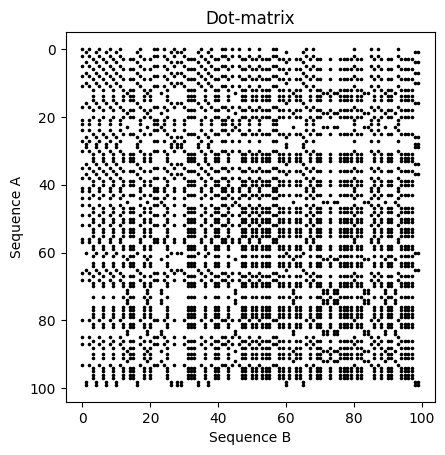

Alignment Score: 100.0
Aligned Sequence A: GAGCAGCAGCAGCTCCAGCTCGGTGCAGAAGCCCAGCAGCCGGCGTGCCGCCGCCCGGCCACTCCAGCGCCTTCTTCCCCGCCTTGCGCTCCTGCCCCAA
Aligned Sequence B: GAGCAGCAGCAGCTCCAGCTCGGTGCAGAAGCCCAGCAGCCGGCGTGCCGCCGCCCGGCCACTCCAGCGCCTTCTTCCCCGCCTTGCGCTCCTGCCCCAA


In [ ]:
# Define the length of the subset you want to use
subset_length = 100

# Take a subset of the sequences
subset_seq1 = seq1[:subset_length]
subset_seq2 = seq2[:subset_length]

# Convert the sequences to strings for alignment
seq1_str = str(subset_seq1)
seq2_str = str(subset_seq2)

# Dot-matrix function
def dot_matrix(seq1, seq2):
    matrix = np.zeros((len(seq1), len(seq2)), dtype=int)
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i] == seq2[j]:
                matrix[i, j] = 1  # Use '1' to represent matches
    return matrix

# Generate the Dot-matrix for the sequences
dot_matrix_result = dot_matrix(seq1_str, seq2_str)

# Visualize the Dot-matrix as a figure with dots
fig, ax = plt.subplots()
for i in range(len(seq1_str)):
    for j in range(len(seq2_str)):
        if dot_matrix_result[i, j] == 1:
            ax.scatter(j, i, c='black', marker='.', s=10)

ax.set_xlabel("Sequence B")
ax.set_ylabel("Sequence A")
ax.set_title("Dot-matrix")
ax.invert_yaxis()  # Invert y-axis to match sequence orientation
ax.set_aspect('equal')  # Set equal aspect ratio for square visualization
plt.show()

# Perform global sequence alignment using a simple matching algorithm
alignments = align.globalxx(seq1_str, seq2_str)

# Choose the first alignment (you can change this based on your requirements)
alignment = alignments[0]

# Extract the aligned sequences and their score
aligned_seq1 = alignment[0]
aligned_seq2 = alignment[1]
alignment_score = alignment[2]

# Print the results
print("Alignment Score:", alignment_score)
print("Aligned Sequence A:", aligned_seq1)
print("Aligned Sequence B:", aligned_seq2)




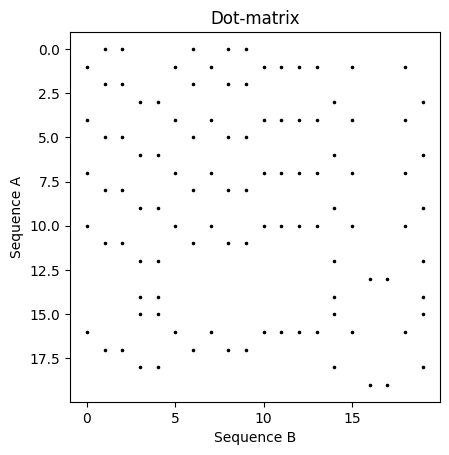

In [ ]:
# Define the sequences
seq1 = "GAGCAGCAGCAGCTCCAGCT"
seq2 = "AGGCCAGAGGAAAACATTAC"

# Dot-matrix function
def dot_matrix(seq1, seq2):
    matrix = np.zeros((len(seq1), len(seq2)), dtype=int)
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i] == seq2[j]:
                matrix[i, j] = 1  # Use '1' to represent matches
    return matrix

# Generate the Dot-matrix for the sequences
dot_matrix_result = dot_matrix(seq1, seq2)

# Visualize the Dot-matrix as a figure with dots
fig, ax = plt.subplots()
for i in range(len(seq1)):
    for j in range(len(seq2)):
        if dot_matrix_result[i, j] == 1:
            ax.scatter(j, i, c='black', marker='.', s=10)

ax.set_xlabel("Sequence B")
ax.set_ylabel("Sequence A")
ax.set_title("Dot-matrix")
ax.invert_yaxis()  # Invert y-axis to match sequence orientation
ax.set_aspect('equal')  # Set equal aspect ratio for square visualization
plt.show()



### K-Tuple Method
>  It is a heuristic approach to sequence alignment, which means it provides an approximate solution that is faster than exact algorithms like Needleman-Wunsch or Smith-Waterman.

In [ ]:
def find_ktuples(sequence, k):
    ktuples = []
    for i in range(len(sequence) - k + 1):
        ktuples.append(sequence[i:i+k])
    return ktuples

def k_tuple_alignment(seq1, seq2, k, match_score=1, mismatch_score=-1, gap_penalty=-1):
    ktuples_seq1 = find_ktuples(seq1, k)
    ktuples_seq2 = find_ktuples(seq2, k)

    # Create a matrix to store the alignment scores
    matrix = np.zeros((len(ktuples_seq1) + 1, len(ktuples_seq2) + 1), dtype=int)

    # Initialize the first row and column with gap penalties
    for i in range(1, len(ktuples_seq1) + 1):
        matrix[i][0] = matrix[i-1][0] + gap_penalty
    for j in range(1, len(ktuples_seq2) + 1):
        matrix[0][j] = matrix[0][j-1] + gap_penalty

    # Fill the matrix with alignment scores
    for i in range(1, len(ktuples_seq1) + 1):
        for j in range(1, len(ktuples_seq2) + 1):
            match = matrix[i-1][j-1] + (match_score if ktuples_seq1[i-1] == ktuples_seq2[j-1] else mismatch_score)
            delete = matrix[i-1][j] + gap_penalty
            insert = matrix[i][j-1] + gap_penalty
            matrix[i][j] = max(match, delete, insert)

    # Traceback to find the optimal alignment
    aligned_seq1 = []
    aligned_seq2 = []
    i, j = len(ktuples_seq1), len(ktuples_seq2)
    while i > 0 and j > 0:
        if matrix[i][j] == matrix[i-1][j-1] + (match_score if ktuples_seq1[i-1] == ktuples_seq2[j-1] else mismatch_score):
            aligned_seq1.append(ktuples_seq1[i-1])
            aligned_seq2.append(ktuples_seq2[j-1])
            i -= 1
            j -= 1
        elif matrix[i][j] == matrix[i-1][j] + gap_penalty:
            aligned_seq1.append(ktuples_seq1[i-1])
            aligned_seq2.append('-')
            i -= 1
        else:
            aligned_seq1.append('-')
            aligned_seq2.append(ktuples_seq2[j-1])
            j -= 1

    while i > 0:
        aligned_seq1.append(ktuples_seq1[i-1])
        aligned_seq2.append('-')
        i -= 1
    while j > 0:
        aligned_seq1.append('-')
        aligned_seq2.append(ktuples_seq2[j-1])
        j -= 1

    # Reverse the aligned sequences to get the correct order
    aligned_seq1.reverse()
    aligned_seq2.reverse()

    return ''.join(aligned_seq1), ''.join(aligned_seq2)

# Example usage
seq1 = "AGCTGATCGTAGCTAGCTAGCTG"
seq2 = "AGGCTGACGTAAGCTAGCTGCTG"
k = 3
aligned_seq1, aligned_seq2 = k_tuple_alignment(seq1, seq2, k)
print("Aligned Sequence A:", aligned_seq1)
print("Aligned Sequence B:", aligned_seq2)


Aligned Sequence A: -AGCGCTCTGTGAGATATCTCGCGTGTA-TAGAGCGCTCTATAGAGCGCTCTATAGAGCGCTCTG
Aligned Sequence B: AGGGGCGCTCTGTGA-GACACGCGTGTATAAAAGAGCGCTCTATAGAGCGCT-CTGTGCGCTCTG


# Clustring
images.avif
- Clustering is a technique used to group similar objects or data points
together based on their similarity. In bioinformatics, clustering is often
used to group genes or proteins based on their expression profiles,
sequence similarity, or other features. Clustering algorithms
commonly used in bioinformatics include hierarchical clustering,
K-means clustering, and self-organizing maps.

- Write a code using bioinformatics data to perform k-means clustering
- Data loading: 5 points
- Clustering: 5 points
- Bonus: 5 points ( Data cleaning and normalization )
- Bonus: 5 points ( Data Visualization)

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=a183370127f2ff4c3080d01aea50f445984812c25070234e77942a5d7c41ee51
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


#### ADRA2A adrenoceptor alpha 2A [ Homo sapiens (human) ]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


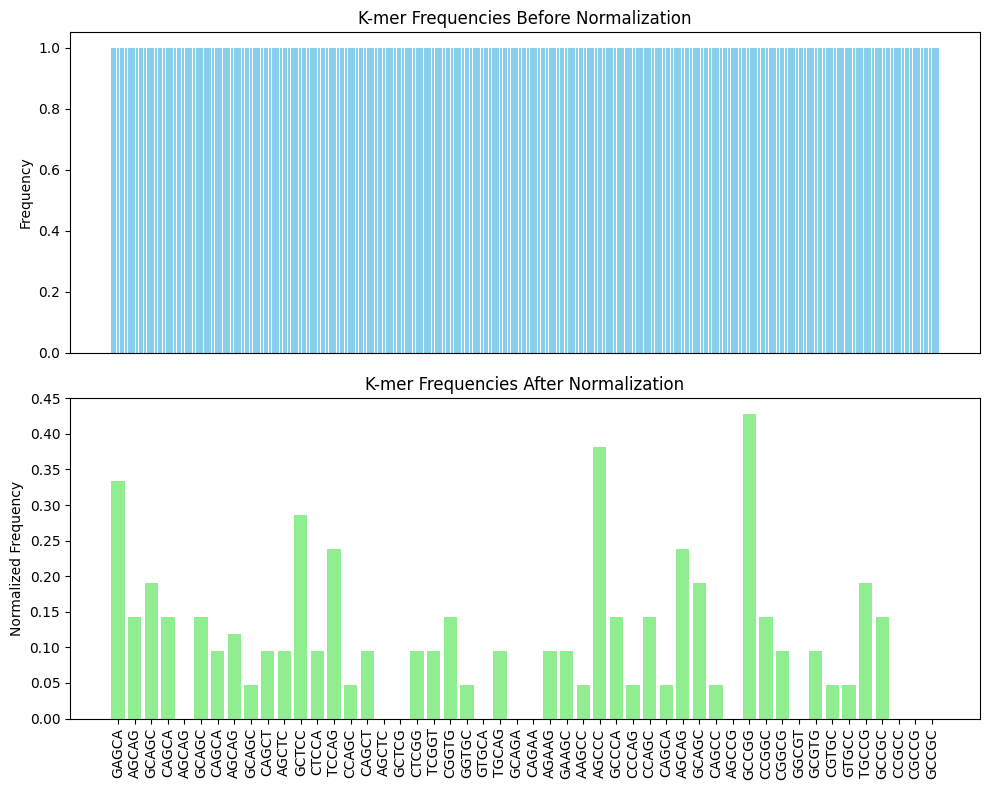

In [ ]:
from Bio import SeqIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import re
from sklearn.decomposition import PCA

# Load the gene sequences from the FASTA files
sequences = [str(record.seq) for record in SeqIO.parse('/content/gene.fna', 'fasta')]

# Choose a subset of sequences (e.g., the first 100 sequences)
subset_sequences = sequences[:100]

# Define the size of k-mers (subsequences)
k = 5

# Create k-mers (subsequences) from the gene sequences
kmers = []
for sequence in subset_sequences:
    # Clean the sequence by removing non-alphabetic characters
    cleaned_sequence = re.sub("[^A-Za-z]", "", sequence)
    kmers.extend([cleaned_sequence[i:i + k] for i in range(len(cleaned_sequence) - k + 1)])

# Convert the k-mers list into a list of strings for CountVectorizer
kmers_list = [" ".join([kmer]) for kmer in kmers]

# Vectorize the data using CountVectorizer
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\S+')
X = vectorizer.fit_transform(kmers_list)

# Number of clusters for K-means
num_clusters_kmeans = 2

# Perform K-means clustering on k-mers frequencies
kmeans = KMeans(n_clusters=num_clusters_kmeans, random_state=42)
kmeans.fit(X)

# Data cleaning and normalization for k-mer frequencies
kmers_frequencies = X.toarray().sum(axis=0)
scaler = MinMaxScaler()
kmers_frequencies_normalized = scaler.fit_transform(kmers_frequencies.reshape(-1, 1)).flatten()

# Data Visualization for K-means
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Visualization of k-mer frequencies before normalization
ax1.bar(range(len(kmers_list)), X.toarray().sum(axis=1).flatten(), color='skyblue')
ax1.set_xticks([])
ax1.set_ylabel('Frequency')
ax1.set_title('K-mer Frequencies Before Normalization')

# Visualization of k-mer frequencies after normalization for the first 50 k-mers
num_kmers_to_plot = 50
ax2.bar(range(num_kmers_to_plot), kmers_frequencies_normalized[:num_kmers_to_plot], color='lightgreen')
ax2.set_xticks(range(num_kmers_to_plot))
ax2.set_xticklabels(kmers_list[:num_kmers_to_plot], rotation=90)
ax2.set_ylabel('Normalized Frequency')
ax2.set_title('K-mer Frequencies After Normalization')

plt.tight_layout()
plt.show()

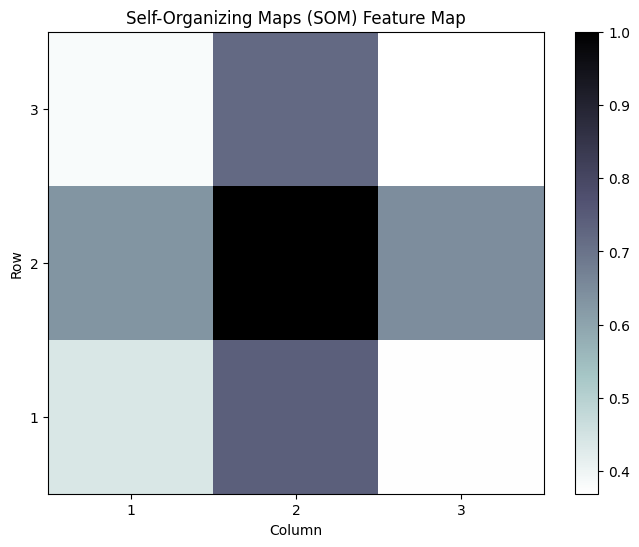

In [ ]:
# Convert the k-mers list into a matrix for SOM
matrix = np.array([np.frombuffer(kmer.encode(), dtype=np.uint8) for kmer in kmers])

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
matrix_normalized = scaler.fit_transform(matrix)

# Number of clusters (grid size) for SOM
num_clusters_som = 3

# Initialize and train the SOM with random reseeding
for _ in range(5):  # You can increase the number of runs for better results
    som = MiniSom(num_clusters_som, num_clusters_som, len(kmers[0]), sigma=0.3, learning_rate=0.5)
    som.random_weights_init(matrix_normalized)
    som.train_random(matrix_normalized, 100)

# Get cluster assignments for each k-mer from SOM
cluster_assignments_som = [som.winner(kmer)[0] * num_clusters_som + som.winner(kmer)[1] for kmer in matrix_normalized]

# Data Visualization for SOM
plt.figure(figsize=(8, 6))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.xticks(np.arange(num_clusters_som) + 0.5, np.arange(num_clusters_som) + 1)
plt.yticks(np.arange(num_clusters_som) + 0.5, np.arange(num_clusters_som) + 1)
plt.title('Self-Organizing Maps (SOM) Feature Map')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


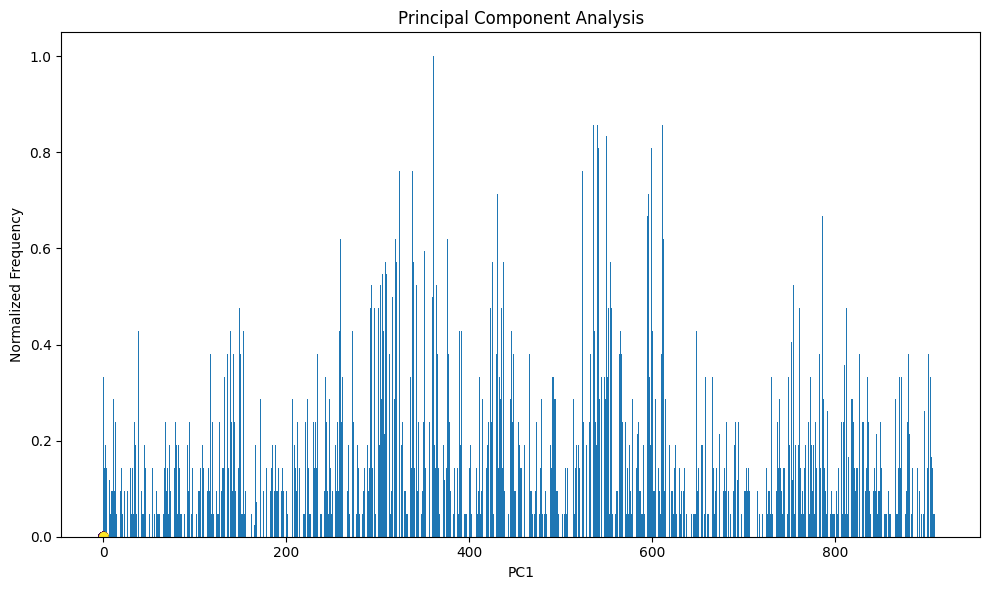

In [ ]:
# Perform PCA using sklearn.decomposition.PCA with n_components=1
pca = PCA(n_components=1)
coordinates = pca.fit_transform(kmers_frequencies_normalized.reshape(-1, 1))

# Perform K-means clustering on PCA coordinates
kmeans_pca = KMeans(n_clusters=num_clusters_kmeans, random_state=42)
kmeans_pca.fit(coordinates)

# Data Visualization for K-means and PCA
plt.figure(figsize=(10, 6))

plt.bar(range(len(kmers_frequencies_normalized)), kmers_frequencies_normalized)
plt.xlabel('K-mer index')
plt.ylabel('Normalized Frequency')
plt.title('Normalized K-mer Frequencies')

plt.scatter(coordinates, np.zeros_like(coordinates), c=kmeans_pca.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.title('Principal Component Analysis')

plt.tight_layout()
plt.show()

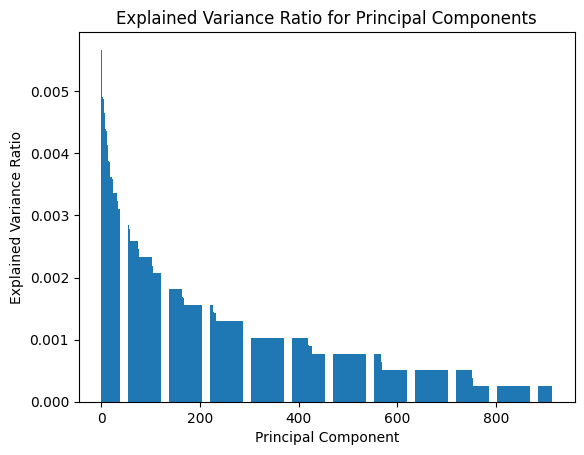

In [ ]:
# Perform PCA using sklearn.decomposition.PCA
pca = PCA()
pca.fit(X.toarray())

# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio in a bar plot
num_components = len(explained_variance_ratio)
component_indices = np.arange(1, num_components + 1)
plt.bar(component_indices, explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.show()


#### ADRA1A adrenoceptor alpha 1A [ Homo sapiens (human) ]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


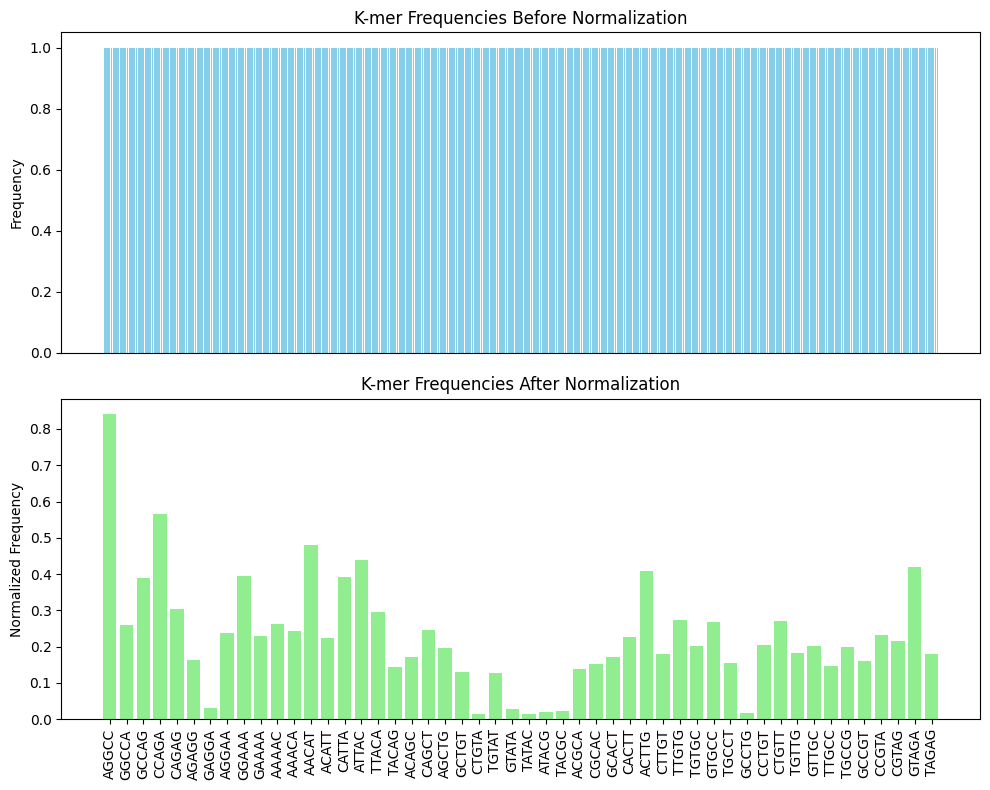

In [ ]:
# Load the gene sequences from the FASTA files
sequence_two = [str(record.seq) for record in SeqIO.parse('/content/gen.fna', 'fasta')]

# Choose a subset of sequences (e.g., the first 100 sequences)
subset_sequence_two = sequence_two[:100]

# Define the size of k-mers (subsequences)
k_two = 5

# Create k-mers (subsequences) from the gene sequences
kmers_two = []
for sequence_two in subset_sequence_two:
    # Clean the sequence by removing non-alphabetic characters
    cleaned_sequence_two = re.sub("[^A-Za-z]", "", sequence_two)
    kmers_two.extend([cleaned_sequence_two[i:i + k_two] for i in range(len(cleaned_sequence_two) - k_two + 1)])

# Convert the k-mers list into a list of strings for CountVectorizer
kmers_list_two = [" ".join([kmer_two]) for kmer_two in kmers_two]

# Vectorize the data using CountVectorizer
vectorizer_two = CountVectorizer(analyzer='word', token_pattern=r'\S+')
X_two = vectorizer_two.fit_transform(kmers_list_two)

# Number of clusters for K-means
num_clusters_kmeans_two = 2

# Perform K-means clustering on k-mers frequencies
kmeans_two = KMeans(n_clusters=num_clusters_kmeans_two, random_state=42)
kmeans_two.fit(X_two)

# Data cleaning and normalization for k-mer frequencies
kmers_frequencies_two = X_two.toarray().sum(axis=0)
scaler_two = MinMaxScaler()
kmers_frequencies_normalized_two = scaler_two.fit_transform(kmers_frequencies_two.reshape(-1, 1)).flatten()

# Data Visualization for K-means
fig_two, (ax1_two, ax2_two) = plt.subplots(2, 1, figsize=(10, 8))

# Visualization of k-mer frequencies before normalization
ax1_two.bar(range(len(kmers_list_two)), X_two.toarray().sum(axis=1).flatten(), color='skyblue')
ax1_two.set_xticks([])
ax1_two.set_ylabel('Frequency')
ax1_two.set_title('K-mer Frequencies Before Normalization')

# Visualization of k-mer frequencies after normalization for the first 50 k-mers
num_kmers_to_plot_two = 50
ax2_two.bar(range(num_kmers_to_plot_two), kmers_frequencies_normalized_two[:num_kmers_to_plot_two], color='lightgreen')
ax2_two.set_xticks(range(num_kmers_to_plot_two))
ax2_two.set_xticklabels(kmers_list_two[:num_kmers_to_plot_two], rotation=90)
ax2_two.set_ylabel('Normalized Frequency')
ax2_two.set_title('K-mer Frequencies After Normalization')

plt.tight_layout()
plt.show()

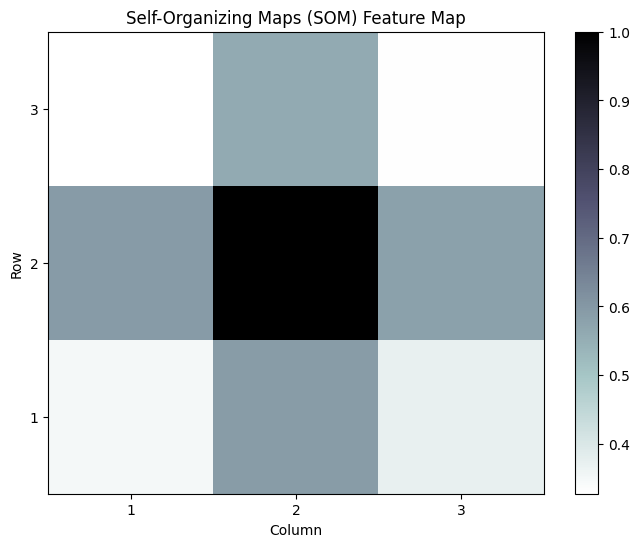

In [ ]:
# Convert the k-mers list into a matrix for SOM
matrix_two = np.array([np.frombuffer(kmer_two.encode(), dtype=np.uint8) for kmer_two in kmers_two])

# Normalize the data using Min-Max scaling
scaler_two = MinMaxScaler()
matrix_normalized_two = scaler_two.fit_transform(matrix_two)

# Number of clusters (grid size) for SOM
num_clusters_som_two = 3

# Initialize and train the SOM with random reseeding
for _ in range(5):  # You can increase the number of runs for better results
    som_two = MiniSom(num_clusters_som_two, num_clusters_som_two, len(kmers_two[0]), sigma=0.3, learning_rate=0.5)
    som_two.random_weights_init(matrix_normalized_two)
    som_two.train_random(matrix_normalized_two, 100)

# Get cluster assignments for each k-mer from SOM
cluster_assignments_som_two = [som_two.winner(kmer_two)[0] * num_clusters_som_two + som_two.winner(kmer_two)[1] for kmer_two in matrix_normalized_two]

# Data Visualization for SOM
plt.figure(figsize=(8, 6))
plt.pcolor(som_two.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.xticks(np.arange(num_clusters_som_two) + 0.5, np.arange(num_clusters_som_two) + 1)
plt.yticks(np.arange(num_clusters_som_two) + 0.5, np.arange(num_clusters_som_two) + 1)
plt.title('Self-Organizing Maps (SOM) Feature Map')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


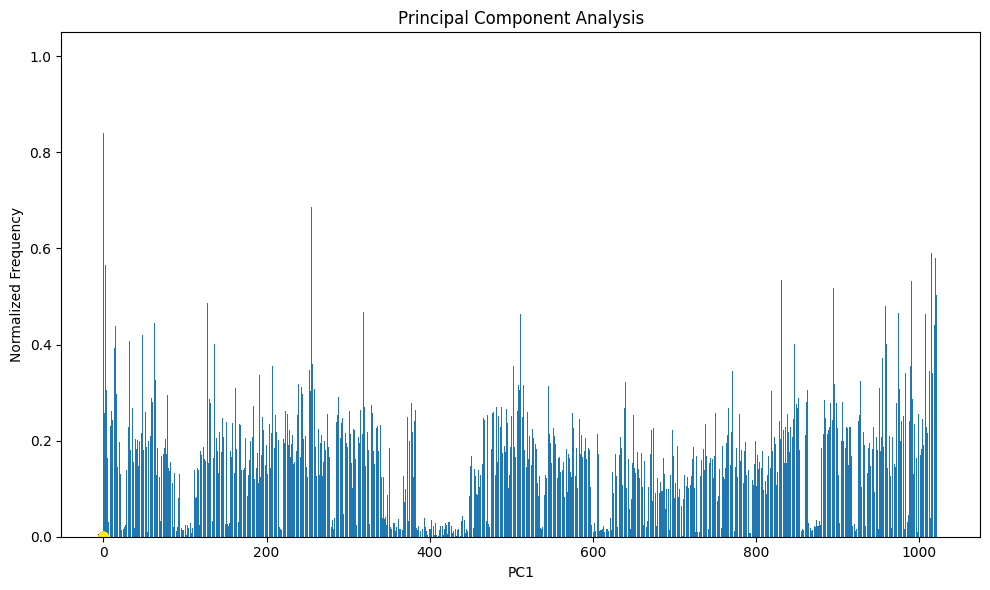

In [ ]:
# Perform PCA using sklearn.decomposition.PCA with n_components=1
pca_two = PCA(n_components=1)
coordinates_two = pca_two.fit_transform(kmers_frequencies_normalized_two.reshape(-1, 1))

# Perform K-means clustering on PCA coordinates
kmeans_pca_two = KMeans(n_clusters=num_clusters_kmeans_two, random_state=42)
kmeans_pca_two.fit(coordinates_two)

# Data Visualization for K-means and PCA
plt.figure(figsize=(10, 6))

plt.bar(range(len(kmers_frequencies_normalized_two)), kmers_frequencies_normalized_two)
plt.xlabel('K-mer index')
plt.ylabel('Normalized Frequency')
plt.title('Normalized K-mer Frequencies')

plt.scatter(coordinates_two, np.zeros_like(coordinates_two), c=kmeans_pca_two.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.title('Principal Component Analysis')

plt.tight_layout()
plt.show()

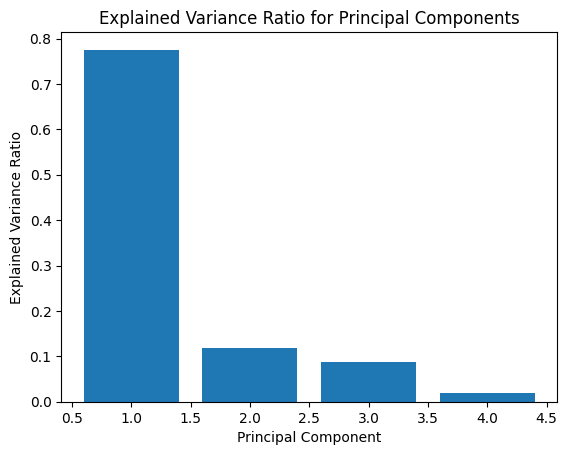

In [ ]:
# Perform PCA using sklearn.decomposition.PCA
pca_two = PCA()
pca_two.fit(kmers_frequencies_normalized_two.reshape(-4, 4))

# Calculate the explained variance ratio for the principal component
explained_variance_ratio_two = pca_two.explained_variance_ratio_

# Plot the explained variance ratio in a bar plot
num_components_two = len(explained_variance_ratio_two)
component_indices_two = np.arange(1, num_components_two + 1)
plt.bar(component_indices_two, explained_variance_ratio_two)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


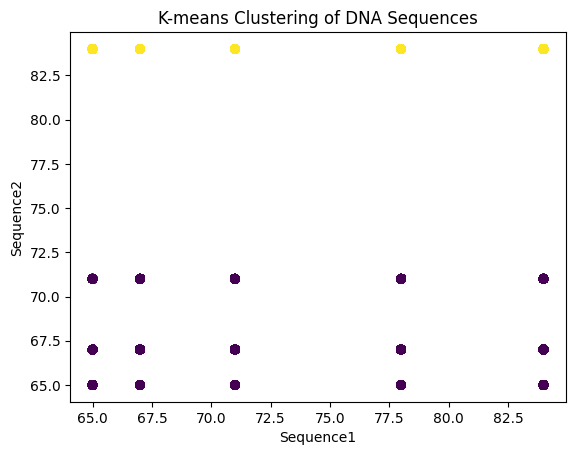

In [ ]:
import numpy as np
import pandas as pd
from Bio import SeqIO
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the sequences from the FASTA files
seq1 = str(next(SeqIO.parse('/content/gene.fna', 'fasta')).seq)
seq2 = str(next(SeqIO.parse('/content/gen.fna', 'fasta')).seq)

# Make sequences of equal length by padding the shorter sequence
max_length = max(len(seq1), len(seq2))
seq1 = seq1.ljust(max_length, 'N')
seq2 = seq2.ljust(max_length, 'N')

# Convert DNA sequences to numerical representation (e.g., using ASCII values of the characters)
seq1_numeric = np.array([ord(char) for char in seq1])
seq2_numeric = np.array([ord(char) for char in seq2])

# Combine the sequences into a single dataframe
df = pd.DataFrame({'Sequence1': seq1_numeric, 'Sequence2': seq2_numeric})

# Perform k-means clustering
num_clusters = 2  # Number of clusters to create
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# visualize the clustering result using a scatter plot.
plt.scatter(df['Sequence1'], df['Sequence2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Sequence1')
plt.ylabel('Sequence2')
plt.title('K-means Clustering of DNA Sequences')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


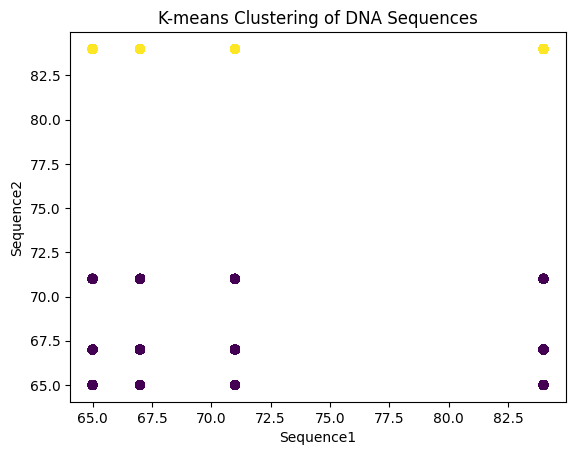

In [ ]:


# Load the sequences from the FASTA files
seq1 = str(next(SeqIO.parse('/content/gene.fna', 'fasta')).seq)
seq2 = str(next(SeqIO.parse('/content/gen.fna', 'fasta')).seq)

# Make the sequences the same length by truncating the longer sequence
min_length = min(len(seq1), len(seq2))
seq1 = seq1[:min_length]
seq2 = seq2[:min_length]

# Convert DNA sequences to numerical representation
seq1_numeric = np.array([ord(char) for char in seq1])
seq2_numeric = np.array([ord(char) for char in seq2])

# Combine the sequences into a single dataframe
df = pd.DataFrame({'Sequence1': seq1_numeric, 'Sequence2': seq2_numeric})

# Perform k-means clustering
num_clusters = 2  # Number of clusters to create
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# visualize the clustering result using a scatter plot.
plt.scatter(df['Sequence1'], df['Sequence2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Sequence1')
plt.ylabel('Sequence2')
plt.title('K-means Clustering of DNA Sequences')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best number of clusters: 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


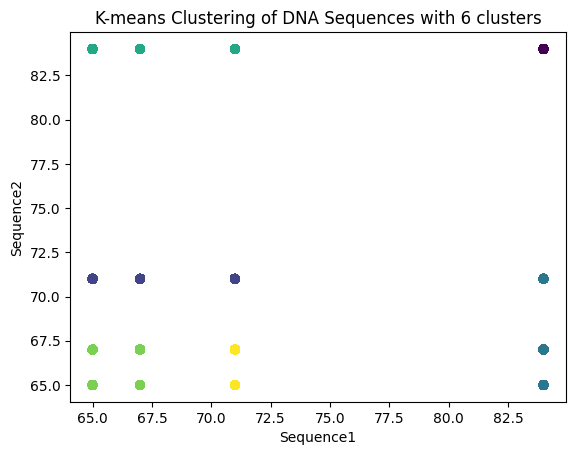

In [ ]:
# Hyperparameter Tuning using Grid Search
# find the optimal number of clusters for k-means using Grid Search.
param_grid = {'n_clusters': [2, 3, 4, 5, 6]}
kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(kmeans, param_grid, cv=5, n_jobs=-1)
grid_search.fit(df)

# Extract the best number of clusters from the grid search results
best_num_clusters = grid_search.best_params_['n_clusters']

print("Best number of clusters:", best_num_clusters)

# Perform k-means clustering with the best number of clusters
kmeans_best = KMeans(n_clusters=best_num_clusters, random_state=42)
df['Cluster'] = kmeans_best.fit_predict(df)

# Data Visualization
plt.scatter(df['Sequence1'], df['Sequence2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Sequence1')
plt.ylabel('Sequence2')
plt.title(f'K-means Clustering of DNA Sequences with {best_num_clusters} clusters')
plt.show()

# Classification
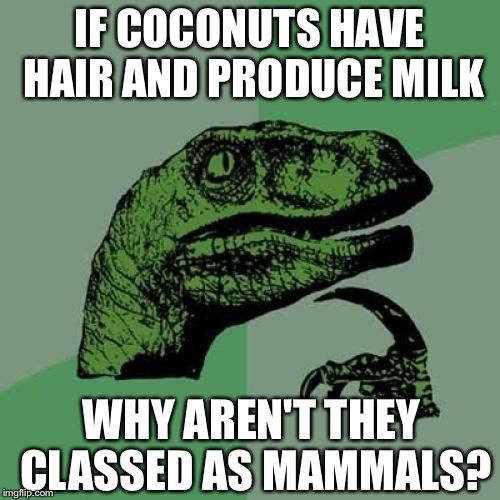
- Classification is a technique used to assign objects or data points to
predefined categories or classes. In bioinformatics, classification is
often used to predict the function of genes or proteins based on their
sequence or expression data. Classification algorithms commonly
used in bioinformatics include decision trees, random forests, support
vector machines, and neural networks.

- Write a code using bioinformatics data to perform k-means clustering
- Data loading: 5 points
- Classification: 5 points
- Bonus: 5 points ( Data cleaning and normalization )
- Bonus: 5 points ( Data Visualization)

In [ ]:
#!pip install biopython

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve
from Bio import SeqIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the sequences from the FASTA files
seq1 = str(next(SeqIO.parse('/content/gene.fna', 'fasta')).seq)
seq2 = str(next(SeqIO.parse('/content/gen.fna', 'fasta')).seq)

# Manually assign class labels: 0 for seq1 and 1 for seq2
labels = [0, 1]

# Combine the sequences into a list for classification
sequences = [seq1, seq2]

# Function to extract k-mers from a sequence
def extract_kmers(sequence, k=4):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    return kmers

# Function to convert k-mer list to numerical vectors
def kmer_to_vector(kmer_list, all_kmers):
    vector = [kmer_list.count(kmer) for kmer in all_kmers]
    return vector

# Extract all possible 4-mers from the sequences
all_kmers = set()
for sequence in sequences:
    kmers = extract_kmers(sequence)
    all_kmers.update(kmers)

# Convert the sequences to numerical vectors using k-mer counting
data = [kmer_to_vector(extract_kmers(seq), all_kmers) for seq in sequences]

# Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(data, labels)

# Predict using the trained classifier
y_pred = classifier.predict(data)

# Calculate accuracy and print classification report
accuracy = accuracy_score(labels, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(labels, y_pred))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



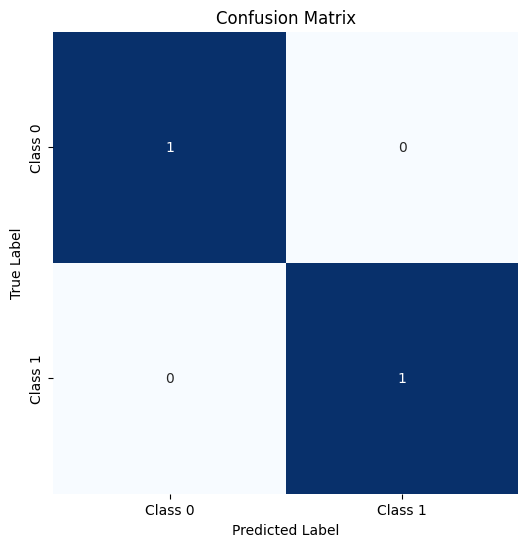

In [ ]:
# Confusion Matrix
cm = confusion_matrix(labels, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Class 0', 'Class 1'])
plt.yticks([0.5, 1.5], ['Class 0', 'Class 1'])
plt.show()


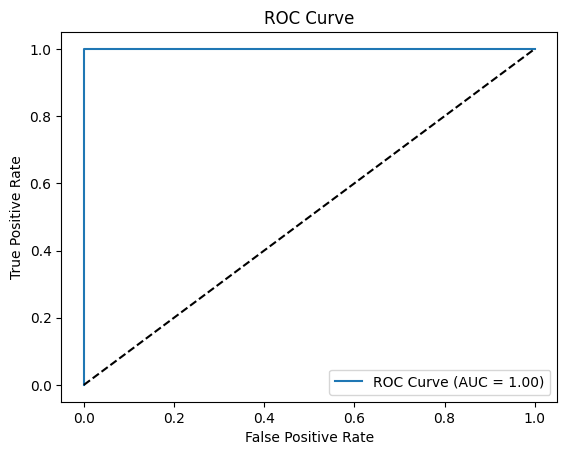

In [ ]:
# ROC Curve
y_pred_prob = classifier.predict_proba(data)[:, 1]
fpr, tpr, _ = roc_curve(labels, y_pred_prob)
roc_auc = roc_auc_score(labels, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

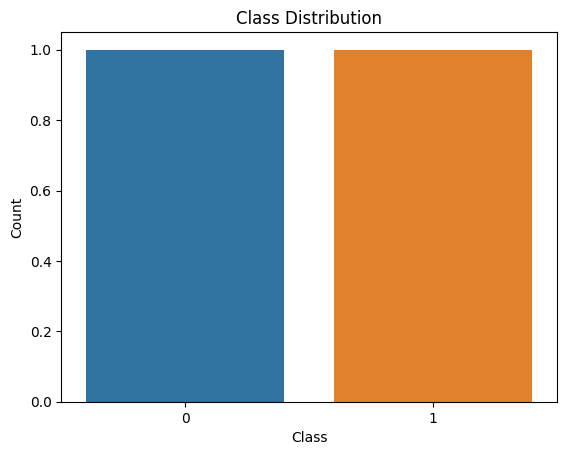

In [ ]:
# Bar Plots
sns.countplot(x=labels)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

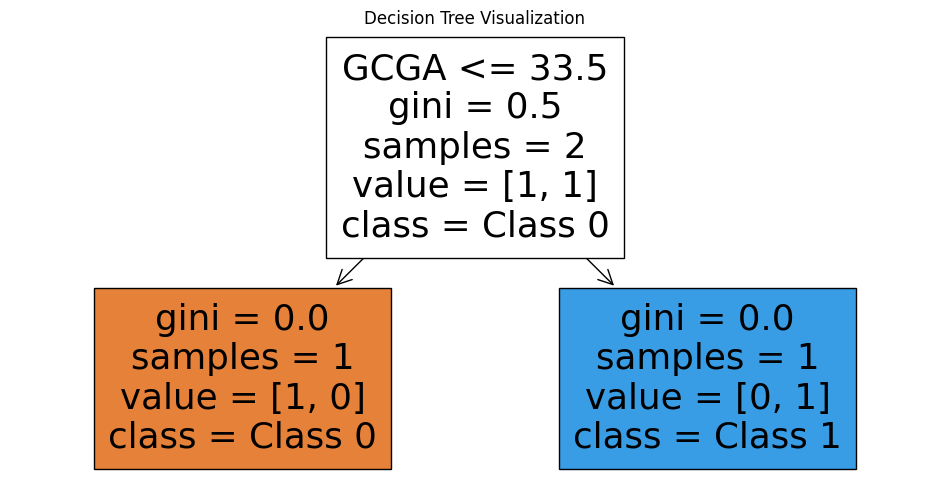

In [ ]:
# Decision Tree Visualization (for Decision Trees)
if isinstance(classifier, DecisionTreeClassifier):
    from sklearn.tree import plot_tree

    plt.figure(figsize=(12, 6))
    plot_tree(classifier, feature_names=list(all_kmers), class_names=['Class 0', 'Class 1'], filled=True)
    plt.title('Decision Tree Visualization')
    plt.show()


# Regression
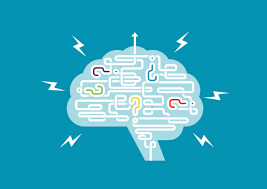
- Regression is a technique used to predict a continuous variable based
on one or more input variables. In bioinformatics, regression is often
used to predict gene expression levels or protein interactions based on
sequence or other features. Regression algorithms commonly used in
bioinformatics include linear regression, logistic regression, and ridge
regression.
- Target
- Write a code using bioinformatics data to perform k-means clustering
- Data loading: 5 points
- Regression: 5 points
- Bonus: 5 points ( Data cleaning and normalization )
- Bonus: 5 points ( Data Visualization)

#### Predict RNA from the DNA Seq

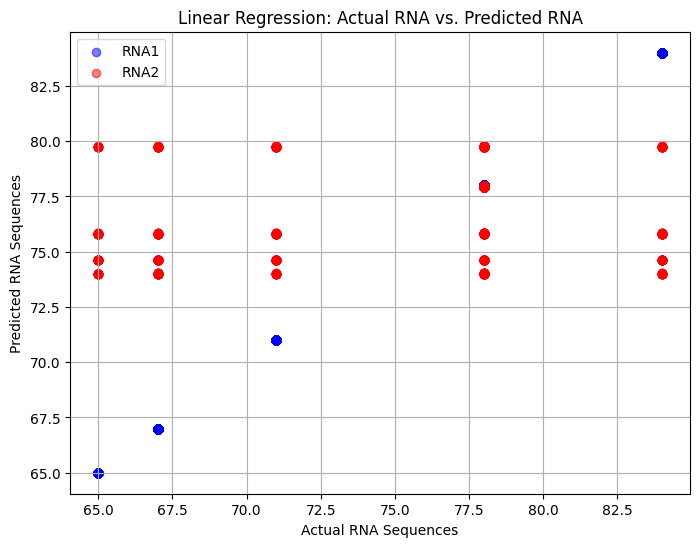

Mean Squared Error (MSE): 0.7865666448337238


In [ ]:
import numpy as np
import pandas as pd
from Bio import SeqIO
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the DNA sequences from the FASTA files
seq1_dna = str(next(SeqIO.parse('/content/gene.fna', 'fasta')).seq)
seq2_dna = str(next(SeqIO.parse('/content/gen.fna', 'fasta')).seq)

# Load the RNA sequences from the FASTA files
seq1_rna = str(next(SeqIO.parse('/content/rna.fna', 'fasta')).seq)
seq2_rna = str(next(SeqIO.parse('/content/rn.fna', 'fasta')).seq)

# Determine the maximum length between DNA and RNA sequences
max_length = max(len(seq1_dna), len(seq2_dna), len(seq1_rna), len(seq2_rna))

# Make DNA sequences of equal length by padding the shorter sequence
seq1_dna = seq1_dna.ljust(max_length, 'N')
seq2_dna = seq2_dna.ljust(max_length, 'N')

# Make RNA sequences of equal length by padding the shorter sequence
seq1_rna = seq1_rna.ljust(max_length, 'N')
seq2_rna = seq2_rna.ljust(max_length, 'N')

# Convert DNA and RNA sequences to numerical representation (e.g., using ASCII values of the characters)
seq1_dna_numeric = np.array([ord(char) for char in seq1_dna])
seq2_dna_numeric = np.array([ord(char) for char in seq2_dna])
seq1_rna_numeric = np.array([ord(char) for char in seq1_rna])
seq2_rna_numeric = np.array([ord(char) for char in seq2_rna])

# Combine the sequences into a single dataframe
df = pd.DataFrame({'DNA1': seq1_dna_numeric, 'DNA2': seq2_dna_numeric,
                   'RNA1': seq1_rna_numeric, 'RNA2': seq2_rna_numeric})

# Split the data into training and testing sets
X = df[['DNA1', 'DNA2']]
y = df[['RNA1', 'RNA2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


# Predict RNA sequences using the regression model
predicted_rna = regressor.predict(X_test)

# Data Visualization: Scatter plot for predicted RNA sequences vs. actual RNA sequences
plt.figure(figsize=(8, 6))

# For RNA1
plt.scatter(y_test['RNA1'], predicted_rna[:, 0], color='blue', label='RNA1', alpha=0.5)
# For RNA2
plt.scatter(y_test['RNA2'], predicted_rna[:, 1], color='red', label='RNA2', alpha=0.5)

plt.xlabel('Actual RNA Sequences')
plt.ylabel('Predicted RNA Sequences')
plt.title('Linear Regression: Actual RNA vs. Predicted RNA')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, predicted_rna)
print("Mean Squared Error (MSE):", mse)



#### Predict Protein from DNA Seq

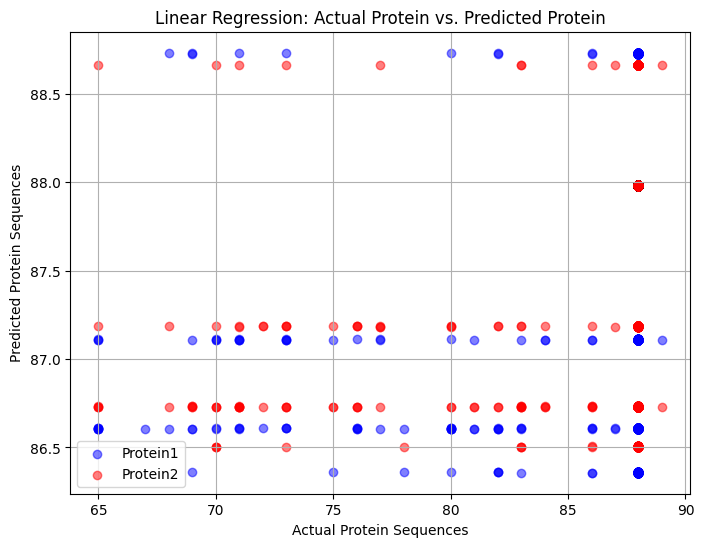

Mean Squared Error (MSE): 0.6635327904622536


In [ ]:
# Load the DNA sequences from the FASTA files
dna1 = str(next(SeqIO.parse('/content/gene.fna', 'fasta')).seq)
dna2 = str(next(SeqIO.parse('/content/gen.fna', 'fasta')).seq)

# Load the protein sequences from the FASTA files
protein1 = str(next(SeqIO.parse('/content/protein.faa', 'fasta')).seq)
protein2 = str(next(SeqIO.parse('/content/protei.faa', 'fasta')).seq)

# Determine the maximum length between DNA and protein sequences
max_length = max(len(dna1), len(dna2), len(protein1), len(protein2))

# Make DNA sequences of equal length by padding the shorter sequence
dna1 = dna1.ljust(max_length, 'N')
dna2 = dna2.ljust(max_length, 'N')

# Make protein sequences of equal length by padding the shorter sequence
protein1 = protein1.ljust(max_length, 'X')
protein2 = protein2.ljust(max_length, 'X')

# Convert DNA and protein sequences to numerical representation (e.g., using ASCII values of the characters)
dna1_numeric = np.array([ord(char) for char in dna1])
dna2_numeric = np.array([ord(char) for char in dna2])
protein1_numeric = np.array([ord(char) for char in protein1])
protein2_numeric = np.array([ord(char) for char in protein2])

# Combine the sequences into a single dataframe
df = pd.DataFrame({'DNA1': dna1_numeric, 'DNA2': dna2_numeric,
                   'Protein1': protein1_numeric, 'Protein2': protein2_numeric})

# Split the data into training and testing sets
X = df[['DNA1', 'DNA2']]
y = df[['Protein1', 'Protein2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict protein sequences using the regression model
predicted_protein = regressor.predict(X_test)

# Data Visualization: Scatter plot for predicted protein sequences vs. actual protein sequences
plt.figure(figsize=(8, 6))

# For Protein1
plt.scatter(y_test['Protein1'], predicted_protein[:, 0], color='blue', label='Protein1', alpha=0.5)
# For Protein2
plt.scatter(y_test['Protein2'], predicted_protein[:, 1], color='red', label='Protein2', alpha=0.5)

plt.xlabel('Actual Protein Sequences')
plt.ylabel('Predicted Protein Sequences')
plt.title('Linear Regression: Actual Protein vs. Predicted Protein')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, predicted_protein)
print("Mean Squared Error (MSE):", mse)


# The End Of the Four Taskes
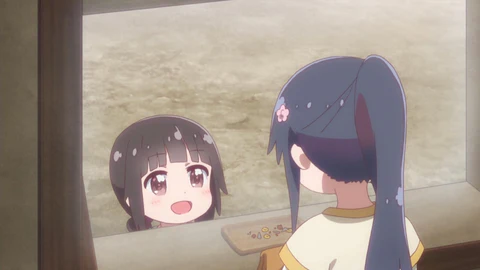